In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [162]:
def minusDate(x):
    return (x - 693963)

def getDateTime(x):
    start_date = datetime(1,1,1)
    return  start_date + timedelta(days=x)

def get_season(date):
    """
    Determine the season for a given date.
    """
    month = date.month
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

def get_year(date):
    return int(date.year)

# Set start date to 1900
df = pd.read_csv("RRCA_baseflow.csv")
df['DateTimes'] = df['Date'].apply(getDateTime)
df['Season'] = df['DateTimes'].apply(get_season)
df['Year'] = df['DateTimes'].apply(get_year)
df['Date'] = df['Date'].apply(minusDate)

# filter specific seasons
# df = df[df['Season'] == "Spring"]

# drop pre 1950
df = df[df['Year']> 1950]

# We have a total of 42 unique segments in this dataset.
unique_segments = df['Segment_id'].unique()
print(unique_segments)

# df.sort_values(by="Observed",)


[144 154 176 171 152  55 118  65  64  63  40 135 157 147 170 136 149  60
 188  59  53 148 138  62  96 178 159 130  97  51 145 196 146 189  56  98]


<Axes: xlabel='Observed', ylabel='Irrigation_pumping'>

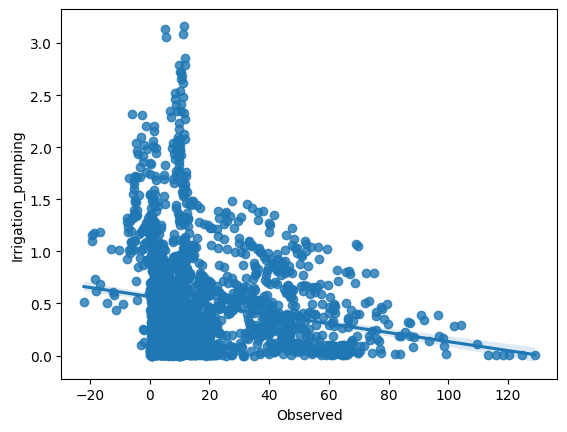

In [166]:
# pumping_df = (df[df['Irrigation_pumping']] != 0) & (df[df['Season']] == 'Summer')
pumping_df = df[(df['Irrigation_pumping'] != 0) & (df['Season'] == 'Summer')]
pumping_df.loc[:, "Irrigation_pumping"] *= -1


pumping_df

sns.regplot(x=pumping_df['Observed'], y=pumping_df['Irrigation_pumping'])

<Axes: xlabel='x', ylabel='y'>

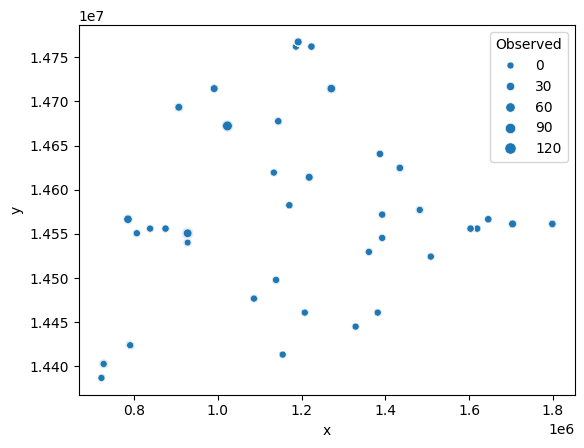

In [ ]:
# Notice that if you compare this to a map of the republican river basin
# they match up well. We will most likely see more base flow as we move east, or in 
#  the positive x axis. this is because more sections of the basin feed in to the a narrower point.
# Interestingly linreg closely maps the actual republican river.

sns.scatterplot(x=df['x'], y=df['y'], size=df['Observed'])
# sns.regplot(x=df['x'], y=df['y'])

<Axes: xlabel='Segment_id', ylabel='Observed'>

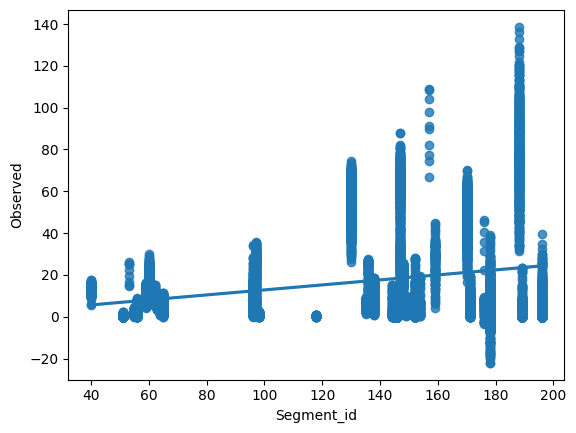

In [ ]:
'''Here we see a couple stations really dominate the flow out at the end. I suspect thise will be on the lower
republican river and close to juncition city/milford lake'''

sns.regplot(x=df['Segment_id'], y=df['Observed'])

<Axes: xlabel='x', ylabel='Observed'>

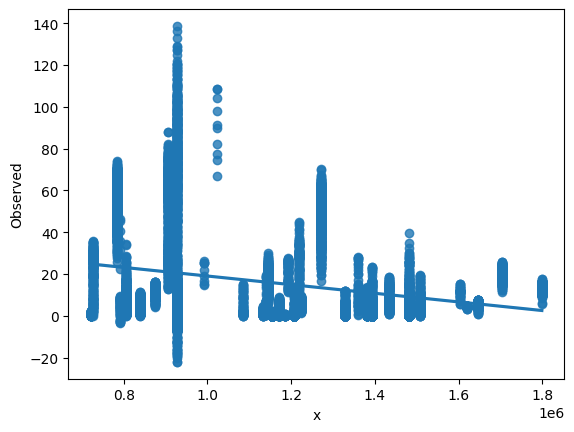

In [ ]:
sns.regplot(x=df['x'], y=df['Observed'])


In [ ]:
# Isolate specific segments.
# segement 144

# for segment_id in unique_segments:
#     df_144 = df[df["Segment_id"] == segment_id]
#     plt.figure()
#     sns.regplot(x=df_144["Date"], y=df_144["Observed"])
#     print("mindate =   " + str(df_144["Date"].max() - df_144["Date"].min()))

<Axes: xlabel='Year', ylabel='Count'>

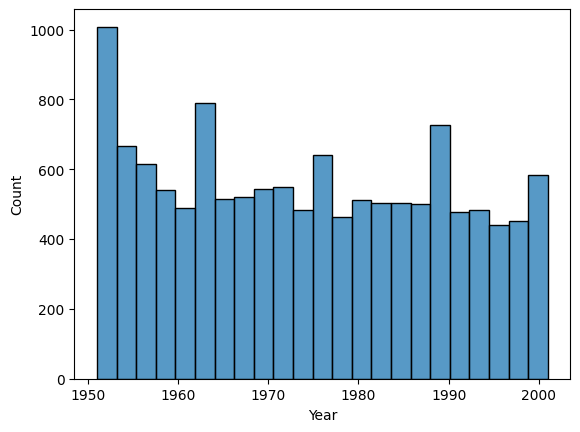

In [ ]:
# Distribution of data across year.
sns.histplot(data=df["Year"])

In [ ]:
year_df = df.groupby('Year').agg({
    'Evapotranspiration': 'mean',
    'Precipitation' : 'mean',
    'Irrigation_pumping' : 'mean',
    'Observed': 'mean'
})
year_df = year_df.reset_index()
year_df
year_df = year_df[year_df["Year"] > 1950]

<Axes: xlabel='Year', ylabel='Observed'>

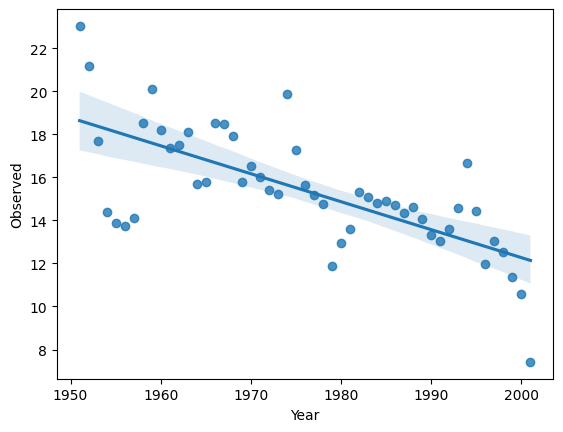

In [ ]:
sns.regplot(x=year_df["Year"], y=year_df["Observed"])

<Axes: xlabel='Irrigation_pumping', ylabel='Observed'>

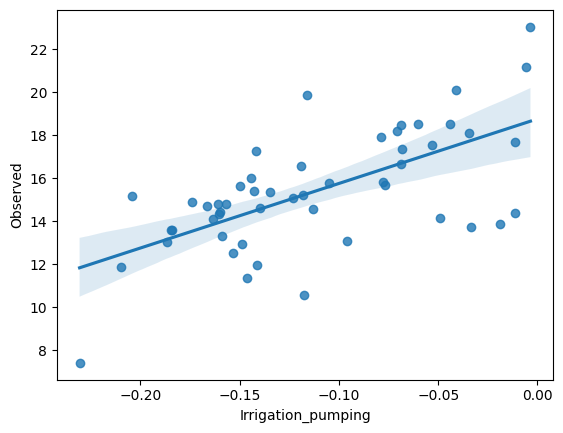

In [ ]:
sns.regplot(x=year_df["Irrigation_pumping"], y=year_df["Observed"])

<Axes: xlabel='Precipitation', ylabel='Observed'>

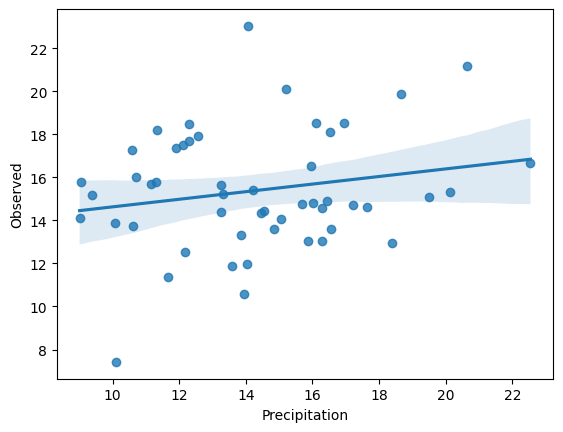

In [167]:
sns.regplot(x=year_df["Precipitation"], y=year_df["Observed"])